In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import json
from dictor import dictor
from pprint import pprint
import os
import re

# specify the folder path
folder_path = Path('replay_jsons/')

def get_json_files(directory: str) -> dict:
    """
    Recursively traverse a directory tree and return a dictionary
    where the keys are the names of each subdirectory and the values
    are the names of the .json files in those subdirectories.

    Args:
        directory (str): The path to the directory to traverse.

    Returns:
        dict: A dictionary where the keys are subdirectory names and
        the values are lists of .json file names in those subdirectories.
    """
    # Initialize an empty dictionary to store the results
    result = {}

    # Create a Path object for the directory
    directory_path = Path(directory)

    # Traverse the directory tree recursively
    for subdirectory in directory_path.iterdir():
        # Check if the item is a directory
        if subdirectory.is_dir() and not subdirectory.name.startswith('.'):
            # Get the name of the subdirectory
            subdirectory_name = subdirectory.name

            # Initialize an empty list to store the JSON file names
            json_files = []

            # Traverse the subdirectory and find all JSON files
            for json_file in subdirectory.glob("[0-9]*.json"):
                if re.match(r'^\d+\.json$', os.path.split(json_file)[-1]):
                    # Add the name of the JSON file to the list
                    json_files.append(json_file)

            # Add the list of JSON file names to the result dictionary
            result[subdirectory_name] = json_files[0].resolve()

    # Return the result dictionary
    return result


files = get_json_files(folder_path)
print(files.keys())

file_to_view = files['v223_0']
print(f'Will be viewing:\n\t{file_to_view}')

with open(file_to_view, 'r') as f:
    full_replay = json.load(f)

seed = int(dictor(full_replay, 'configuration.seed'))
my_team = dictor(full_replay, 'info.TeamNames').index('Tim Child')
my_player = f'player_{my_team}'
replay_steps = full_replay['steps']
print(f'seed = {seed}\nmy team = {my_team}, my_player = {my_player}')

dict_keys(['0_TL_C_rubble_heavychaselight', '225_TL_rubbleplanner', '50_R_everything', 'v223_0'])
Will be viewing:
	D:\GitHub\lux2022\agent_v2_2\replay_jsons\v223_0\50205300.json
seed = 29030187
my team = 1, my_player = player_1


In [ ]:
from agent import Agent
from util import show_env, MyReplayEnv

env = MyReplayEnv(seed, Agent, full_replay, my_player=my_player)

In [4]:
# Clear log file
with open('logfile.log', 'w') as f:
    pass

lichen=0
{'player_0': {'faction': 'TheBuilders', 'bid': 0}, 'player_1': {'bid': 2.5218701415060707, 'faction': 'FirstMars'}}
lichen=0
{'player_0': {}, 'player_1': {'metal': 300, 'spawn': array([39,  2]), 'water': 289}}
lichen=0
{'player_0': {'spawn': (18, 44), 'metal': 150, 'water': 150}, 'player_1': {'metal': 298, 'spawn': array([18, 44]), 'water': 309}}
lichen=0
{'player_0': {}, 'player_1': {'metal': 298, 'spawn': array([22, 32]), 'water': 309}}
lichen=0
{'player_0': {'spawn': (2, 4), 'metal': 150, 'water': 150}, 'player_1': {'metal': 0, 'spawn': array([13, 46]), 'water': 0}}
lichen=0
{'player_0': {}, 'player_1': {'metal': 0, 'spawn': array([13, 46]), 'water': 0}}
lichen=0
{'player_0': {'spawn': (6, 1), 'metal': 150, 'water': 150}, 'player_1': {'metal': 0, 'spawn': array([3, 6]), 'water': 0}}
lichen=0
{'player_0': {}, 'player_1': {'metal': 0, 'spawn': array([ 1, 12]), 'water': 0}}
lichen=0
{'player_0': {'spawn': (19, 36), 'metal': 150, 'water': 150}, 'player_1': {}}


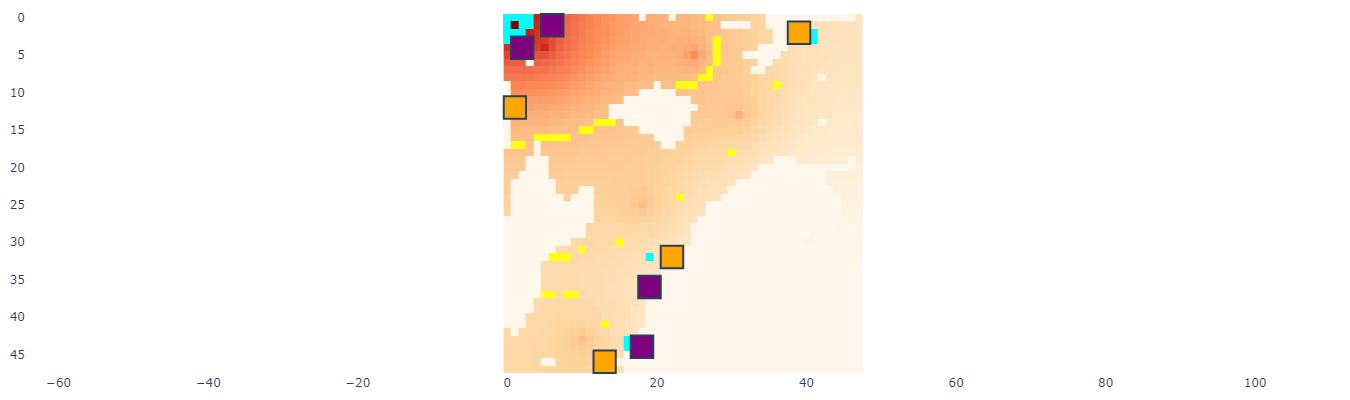

In [48]:
env.run_early_setup()
env.show()

  0%|          | 0/11 [00:00<?, ?it/s]

lichen=0
lichen=15
lichen=11
lichen=0
lichen=12
lichen=0
lichen=12
lichen=0
lichen=12
lichen=0
lichen=12


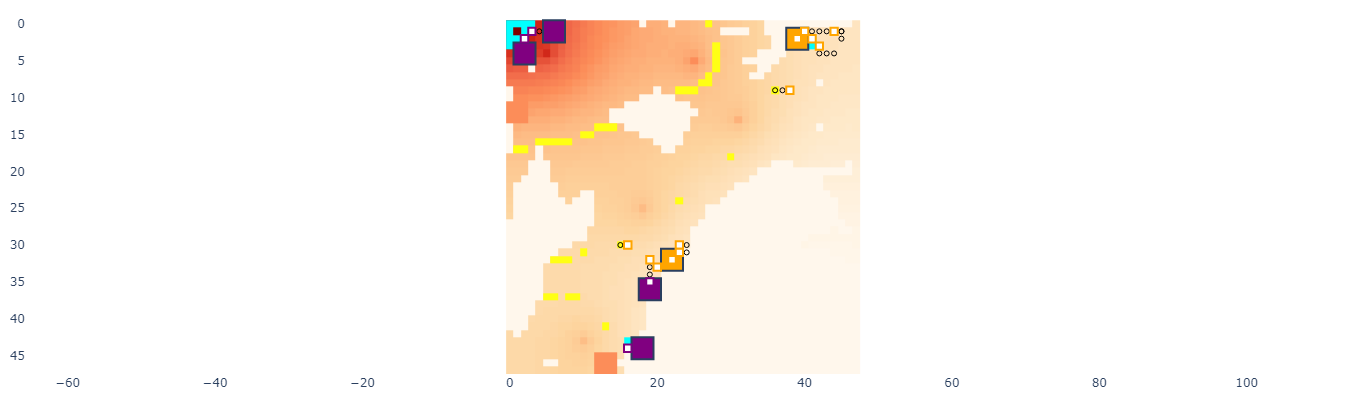

In [49]:
# env.run_to_step(55)
env.run_to_step(10)
env.show()

## Run one step at a time

In [67]:
env.step()
# env.show()

lichen is 106
lichen is 106
lichen is 106


True

In [60]:
agent = env.agent
agent.master.maps.test()

lichen is 0


In [14]:
import numpy as np
from util import show_map_array, power_cost_of_path
import util

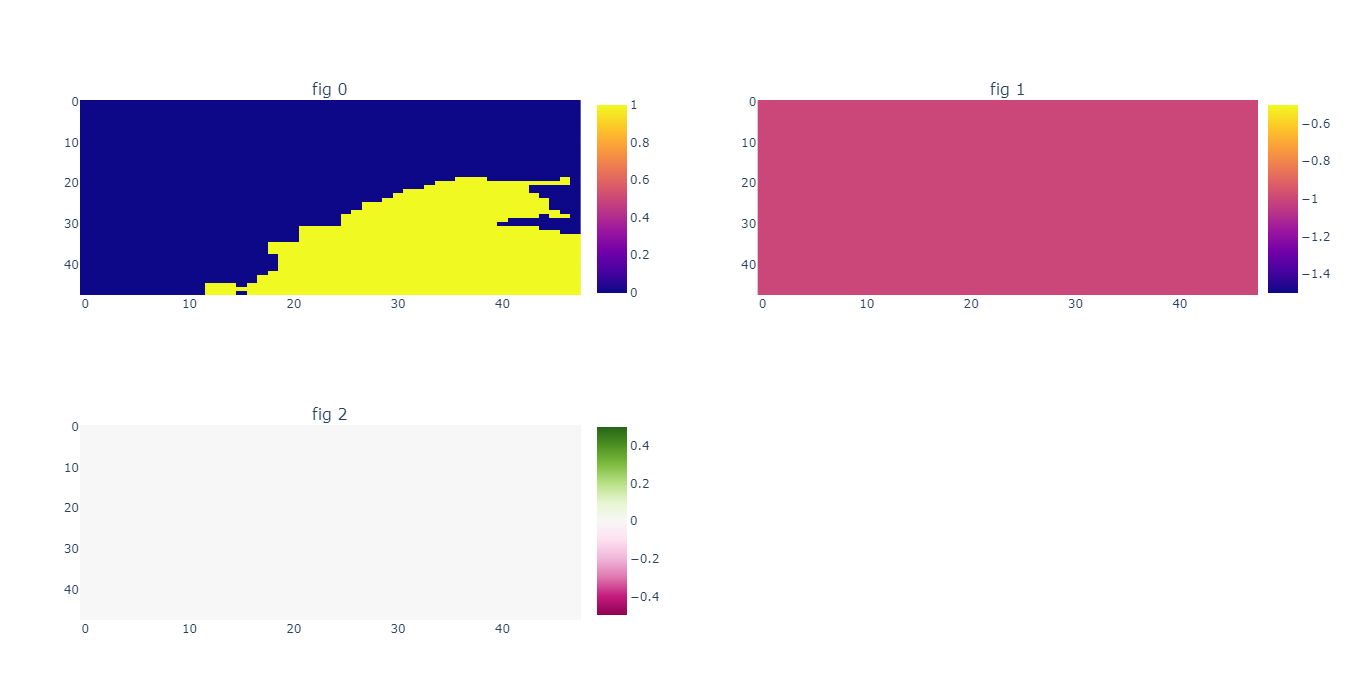

In [36]:
connected_zeros = util.connected_array_values_from_pos(agent.master.maps.rubble, (19,36), 0)
other_lichen = agent.master.maps.lichen_strains
lichen = agent.master.game_state.board.lichen
figs = []
for arr in [connected_zeros, other_lichen, lichen]:
    figs.append(show_map_array(arr).update_layout(width=500, height=400))
fig = util.figures_to_subplots(figs).update_layout(width=900, height=700).update_yaxes(autorange='reversed')
fig.show()

In [44]:
env.env.state.board.lichen.sum()

906

In [27]:
np.sum((connected_zeros > 0) & (other_lichen < 0))

683

In [14]:
# power_cost_of_path(path = np.array([[2,3], [2,4]]), agent.master.maps.rubble, 'LIGHT', 


In [43]:
arr = env.env.state.board.lichen_strains[20:30,25:35]
arr2 = np.zeros_like(arr)
arr2[:5,5:] = 1
np.sum((arr & arr2 > 0))

15

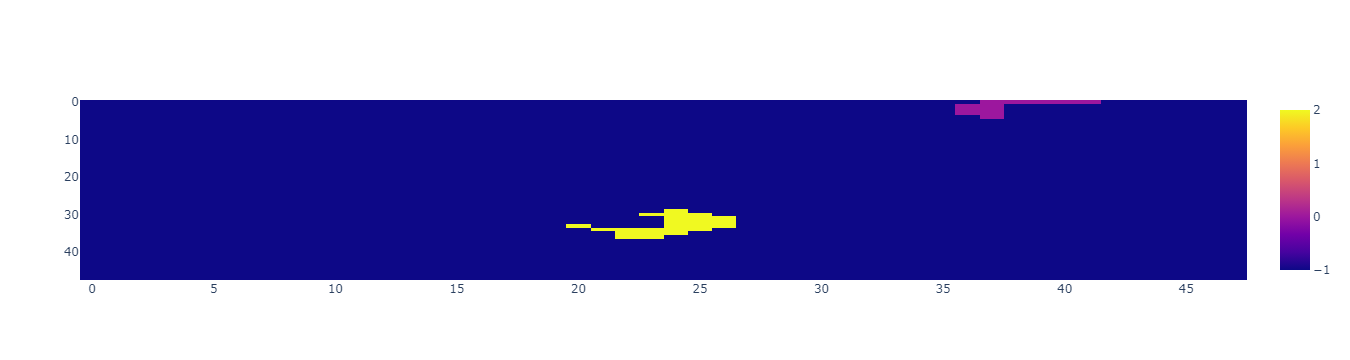

In [18]:
show_map_array(agent.master.game_state.board.lichen_strains)